In [5]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from scipy.stats import beta

In [4]:
# Zimi 9541 Headstrap success and failure rates
headstrap_successes = 5
headstrap_failures = 7

# Zimi 9541 Earloop success and failure rates
earloop_successes = 1
earloop_failures = 16


## Prior Belief

Let's assume that we have no idea what the pass rates for earloops and headstraps are for Zimi 9541, *before* seeing the data. In other words, we could use a uniform distribution prior on the pass rates for both earloop and headstraps. We can model that with Beta(alpha = 1, beta=1):

In [38]:
prior = beta(a=1, b=1)

The alpha = 1 and beta = 1 are imaginary / pseudo counts of successes and failures. Alpha represents successful counts and beta represents failure counts.

Text(0.5, 1.0, 'Samples of uniform distribution')

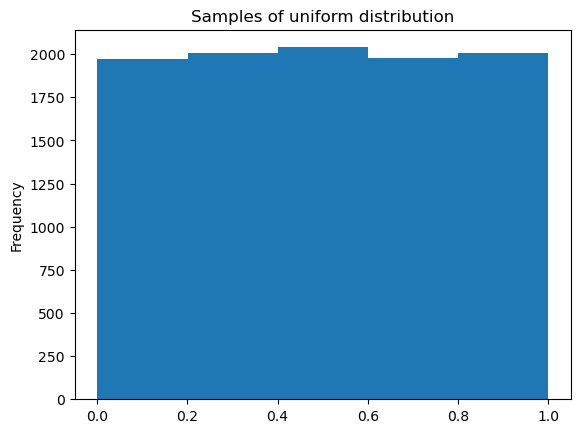

In [39]:
fig, ax = plt.subplots(1,1)
pd.Series(prior.rvs(10000)).plot.hist(bins=5, ax=ax)
ax.set_title('Samples of uniform distribution')

## posterior distribution

We can modify our prior beliefs by adding the observed successes and failures. Adding the number of observed successes to the alpha and the number of observed failures to the beta parameters gives us the combined counts incorporating prior and data, to get the updated beliefs (posterior distribution).

In [7]:
posterior_headstrap = beta(a=headstrap_successes + 1, b=headstrap_failures + 1)
posterior_earloop = beta(a=earloop_successes + 1, b=earloop_failures + 1)

In [18]:
posterior_headstrap_samples = posterior_headstrap.rvs(10000)
posterior_earloop_samples = posterior_earloop.rvs(10000)

Text(0.5, 1.0, 'Zimi 9541 Headstrap vs. Earloop Posterior Distribution of Pass Rates')

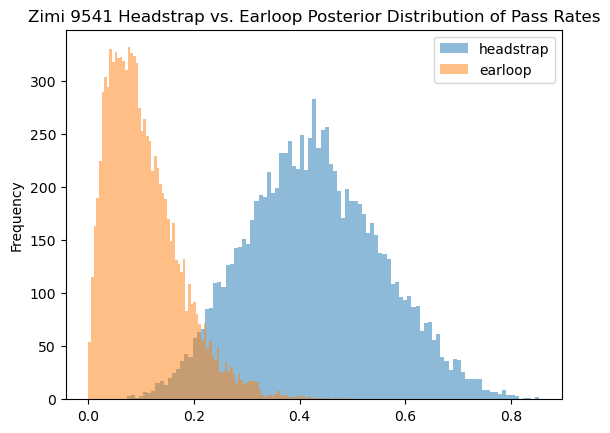

In [19]:
fig, ax = plt.subplots(1,1)
pd.Series(posterior_headstrap_samples).plot.hist(bins=100, ax=ax, alpha=0.5)
pd.Series(posterior_earloop_samples).plot.hist(bins=100, ax=ax, alpha=0.5)
ax.legend(['headstrap', 'earloop'])
ax.set_title('Zimi 9541 Headstrap vs. Earloop Posterior Distribution of Pass Rates')

In [20]:
posterior_headstrap_minus_earloop = posterior_headstrap_samples - posterior_earloop_samples

Text(0.5, 1.0, 'Posterior of headstrap minus earloop pass rates for Zimi 9541')

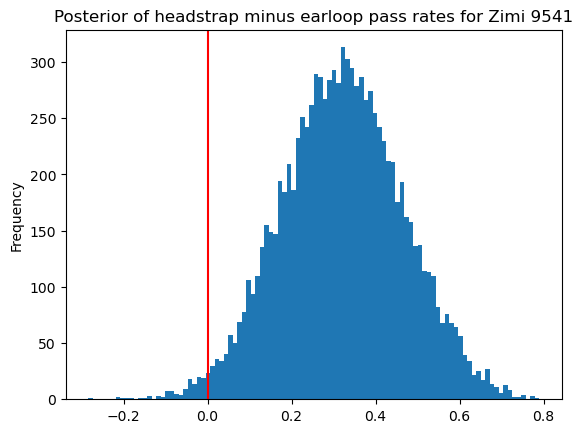

In [28]:
fig, ax = plt.subplots(1,1)
pd.Series(posterior_headstrap_minus_earloop).plot.hist(bins=100, ax=ax)
ax.axvline(0, color='r')
ax.set_title('Posterior of headstrap minus earloop pass rates for Zimi 9541')

In [29]:
probability_of_headstrap_being_a_better_choice_than_earloop = (posterior_headstrap_minus_earloop > 0).sum() / posterior_headstrap_minus_earloop.shape[0]
probability_of_headstrap_being_a_better_choice_than_earloop

0.9867

# TODO

The effect estimate could have confounding (i.e. common cause or causes relate the treatment and the outcome). The earloops and headstrap versions were handed out to participants regardless of people's demographics. However, it's quite possible that people might prioritize testing masks that they have a preference for (e.g. people with long hair, which skew towards women, might have a harder time putting on headstraps than putting on earloops).

| - | Zimi 9541 Headstrap | Zimi 9541 Earloop |
| - | - | - |
| cisgender_male_count | 10 | 6 | 
| cisgender_female_count | 6 | 0 |
| prefer_not_to_disclose_gender_sex_count | 1 | 6 |

Need to add adjustment / control for demographics 